<h2 style="text-align:center; font-weight: 700;">Optimizers for Supervised Deep Learning models</h2>

In [97]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

<h3>Auxiliary Functions</h3>

In [98]:
def binary_sigmoidal(Y_in):
  return 1 / (1 + np.exp(-Y_in))

def find_Y_hat(x, w, b):
  if type(x) == type([1]) or type(x) == type((1, 2)):  # if list of list or list of tuples is used, individual list/tuple should be handled differently
    Y_in = np.dot(x, w) + b                            # layer of input neurons (if list of values passed as neuron)
  else:
    Y_in = x * w + b
  Y_hat = binary_sigmoidal(Y_in)
  
  return Y_hat

In [99]:
def delta_w(x, y, Y_hat):
  return(-2 * (y - Y_hat) * Y_hat * (1 - Y_hat) * x)    # derivative of binary sigmoidal is y_hat(1 - y_hat) and no, not y_in, y_hat is correct. Refer notes for more clarity

In [100]:
def delta_b(y, Y_hat):
  return(-2 * (y - Y_hat) * Y_hat * (1 - Y_hat))

In [101]:
X = [0.5, 2.5, 1.2]       # adding in a third point to make mini-batch GD actually work in mini-batches instead of either being stochastic or batch GD
Y = [0.2, 0.9, 0.4]
# X = [0.5, 2.5]
# Y = [0.2, 0.9]
noofepochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9
2,1.2,0.4


<h3>Batch Gradient Descent</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>all</b></i> the records (rows) i.e, at the end of every epoch</p>

In [102]:
def batch_gradient_descent(X, Y, noofepochs = 300):
  w = -2; η = 1; b = -2;
  dw, db = 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw += delta_w(x, y, Y_hat)
      db += delta_b(y, Y_hat)
    
    w += (-η * dw / len(X))
    b += (-η * db / len(X))
    dw, db = 0, 0
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [103]:
y_hats_bgd, errors_bgd, weights_bgd, biases_bgd = batch_gradient_descent(X, Y, noofepochs)

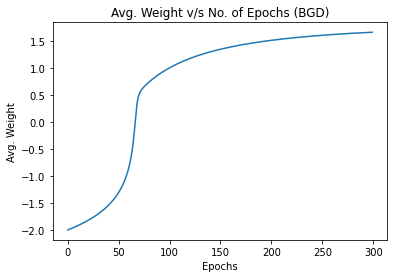

In [104]:
plt.title("Avg. Weight v/s No. of Epochs (BGD)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_bgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Stochastic Gradient Descent</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch.</p>

In [105]:
def stochastic_gradient_descent(X, Y, noofepochs = 300):
  w = -2; η = 1; b = -2;
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      w += (-η * delta_w(x, y, Y_hat))
      b += (-η * delta_b(y, Y_hat))

    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [106]:
y_hats_sgd, errors_sgd, weights_sgd, biases_sgd = stochastic_gradient_descent(X, Y, noofepochs)

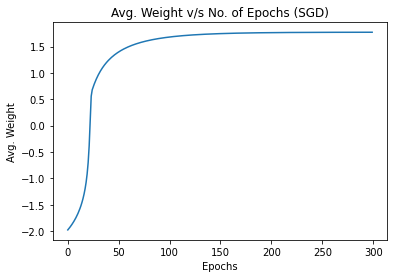

In [107]:
plt.title("Avg. Weight v/s No. of Epochs (SGD)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_sgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Mini-Batch Gradient Descent</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>batch-size</b></i> number of record(s) (row(s)) in an epoch.</p>

In [108]:
def mini_batch_gradient_descent(X, Y, noofepochs = 300, batch_size = 2):
  w = -2; η = 1; b = -2;
  dw, db = 0, 0
  noofpoints_seen = 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw += delta_w(x, y, Y_hat)
      db += delta_b(y, Y_hat)
      noofpoints_seen += 1
      if noofpoints_seen % batch_size == 0:
        w += (-η * dw / batch_size)
        b += (-η * db / batch_size)
        dw, db = 0, 0

    
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [109]:
y_hats_mbgd, errors_mbgd, weights_mbgd, biases_mbgd = mini_batch_gradient_descent(X, Y, noofepochs)

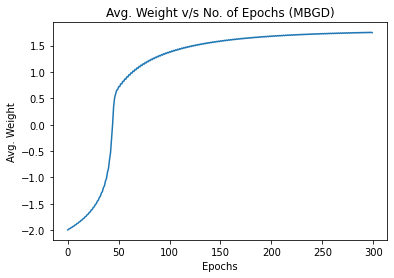

In [110]:
plt.title("Avg. Weight v/s No. of Epochs (MBGD)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_mbgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Stochastic Gradient Descent with Momentum</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but indirectly, i.e considering updation caused by past records as well (I am carrying it out similar to SGD)</p>


In [111]:
def sgd_w_momentum(X, Y, noofepochs = 300, ß = 0.5):
  w = -2; η = 1; b = -2;
  dw, db, vw, vb = 0, 0, 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw = delta_w(x, y, Y_hat)
      db = delta_b(y, Y_hat)
      vw = ß * vw + (1 - ß) * dw      # 'v_' term updates considering previous 'v_' term, this is what we mean when considering the past
      vb = ß * vb + (1 - ß) * db
      w += (-η * vw)
      b += (-η * vb)

    vw, vb = 0, 0                   #! history is per epoch, have to reset it after the end of one
    
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [112]:
y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm = sgd_w_momentum(X, Y, noofepochs)

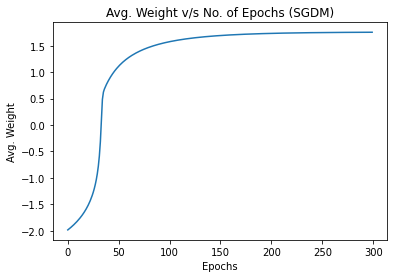

In [113]:
plt.title("Avg. Weight v/s No. of Epochs (SGDM)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_sgdm]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Nesterov Accelerated Gradient Descent</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but indirectly in two steps, first by only the history then by the current derivative of the loss function w.r.t weight(s).</p>


In [114]:
def nesterov_acc_gd(X, Y, noofepochs = 300, ß = 0.5):
  w = -2; η = 1; b = -2;
  dw, db, vw, vb = 0, 0, 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      w_temp = w - ß * vw                           # history component first
      b_temp = b - ß * vb

      Y_hat = find_Y_hat(x, w_temp, b)             # for w in dw (δL / δw) to be w_temp, the y_hat has to be calculated using w_temp, it is this which will make L (error) depend on w_temp and therefore differentiable to it
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw = delta_w(x, y, Y_hat)
      db = delta_b(y, Y_hat)
      
      w = w_temp - η * dw                         # then the partial derivative component (which is modified) to update the weight
      b = b_temp - η * db
      vw = ß * vw + (1 - ß) * dw
      vb = ß * vb + (1 - ß) * db

    vw, vb = 0, 0
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [115]:
y_hats_nagd, errors_nagd, weights_nagd, biases_nagd = nesterov_acc_gd(X, Y, noofepochs)

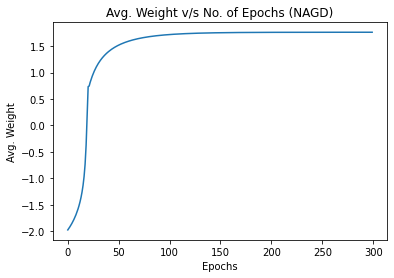

In [116]:
plt.title("Avg. Weight v/s No. of Epochs (NAGD)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_nagd]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Adagrad</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but learning rate changes over time</p>


In [117]:
def adagrad(X, Y, noofepochs = 300):
  w = -2; η = 1; b = -2;
  ε = 0.5
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []
    dw_2_list = [0]
    db_2_list = [0]

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      
      dw = delta_w(x, y, Y_hat)
      dw_2_list.append(dw ** 2)
      db = delta_b(y, Y_hat)
      db_2_list.append(db ** 2)
      
      w = w + (-η / (sum(dw_2_list) + ε) ** 0.5) * dw
      b = b + (-η / (sum(db_2_list) + ε) ** 0.5) * db

    dw_2_list.clear()
    db_2_list.clear()
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [118]:
y_hats_adg, errors_adg, weights_adg, biases_adg = adagrad(X, Y, noofepochs)

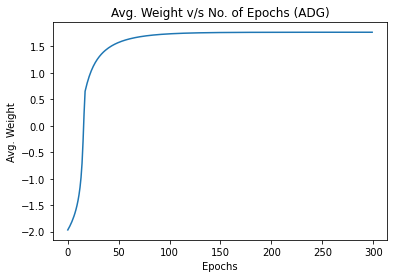

In [119]:
plt.title("Avg. Weight v/s No. of Epochs (ADG)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_adg]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>AdaDelta-RMSprop</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but learning rate changes over time gradually</p>

In [120]:
def adadelta_rmsprop(X, Y, noofepochs = 300, ß = 0.5):
  w = -2; η = 1; b = -2;
  ε = 0.1
  vw, vb = 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      
      dw = delta_w(x, y, Y_hat)
      db = delta_b(y, Y_hat)
      vw = ß * vw + (1 - ß) * (dw ** 2)
      vb = ß * vb + (1 - ß) * (db ** 2)
      w = w + (-η / ((vw + ε) ** 0.5)) * dw
      b = b + (-η / ((vb + ε) ** 0.5)) * db
      
    vw, vb = 0, 0
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [121]:
y_hats_adrp, errors_adrp, weights_adrp, biases_adrp = adadelta_rmsprop(X, Y, noofepochs)

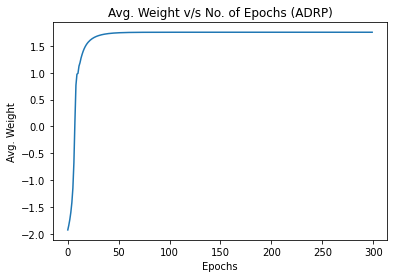

In [122]:
plt.title("Avg. Weight v/s No. of Epochs (ADRP)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_adrp]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3>Adam</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but learning rate changes over time gradually and so does the weights</p>

In [123]:
def adam(X, Y, noofepochs = 300, ß1 = 0.5, ß2 = 0.5):
  w = -2; η = 1; b = -2;
  ε = 0.01
  record_num = 0
  total_count = 0
  mw, mb, vw, vb = 0, 0, 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      record_num += 1
      total_count += 1
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      
      # calculating partial derivative (∇L) w.r.t w and b
      dw = delta_w(x, y, Y_hat)
      db = delta_b(y, Y_hat)
      
      # calculating gradient-momentum component
      mw = ß1 * mw + (1 - ß1) * dw
      mb = ß1 * mb + (1 - ß1) * db

      # calculating the propagation component
      vw = ß2 * vw + (1 - ß2) * (dw ** 2)
      vb = ß2 * vb + (1 - ß2) * (db ** 2)
      #! Bias Correction -> Resulted in too small of a number for weight updation (nan error) -> I think it's an infinity issue, denom became 1 - 1
      # m_hat_w = mw / 1 - ß1
      # m_hat_b = mb / 1 - ß1

      # v_hat_w = vw / 1 - ß2
      # v_hat_b = vb / 1 - ß2

      # Actual weight updation
      # w = w + (-η / ((v_hat_w + ε) ** 0.5)) * m_hat_w
      # b = b + (-η / ((v_hat_b + ε) ** 0.5)) * m_hat_b
      w = w + (-η / ((vw + ε) ** 0.5)) * mw
      b = b + (-η / ((vb + ε) ** 0.5)) * mb
      
    mw, mb, vw, vb, record_num = 0, 0, 0, 0, 0           # epoch-end reset
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [124]:
y_hats_adam, errors_adam, weights_adam, biases_adam = adam(X, Y, noofepochs)

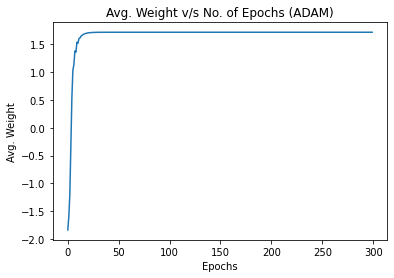

In [125]:
plt.title("Avg. Weight v/s No. of Epochs (ADAM)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_adam]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

<h3 style="font-family: Poppins; color: #e51fac">Collective Comparison</h3>

<h4 style="color: pink;">i) Weights v/s Epochs</h4>

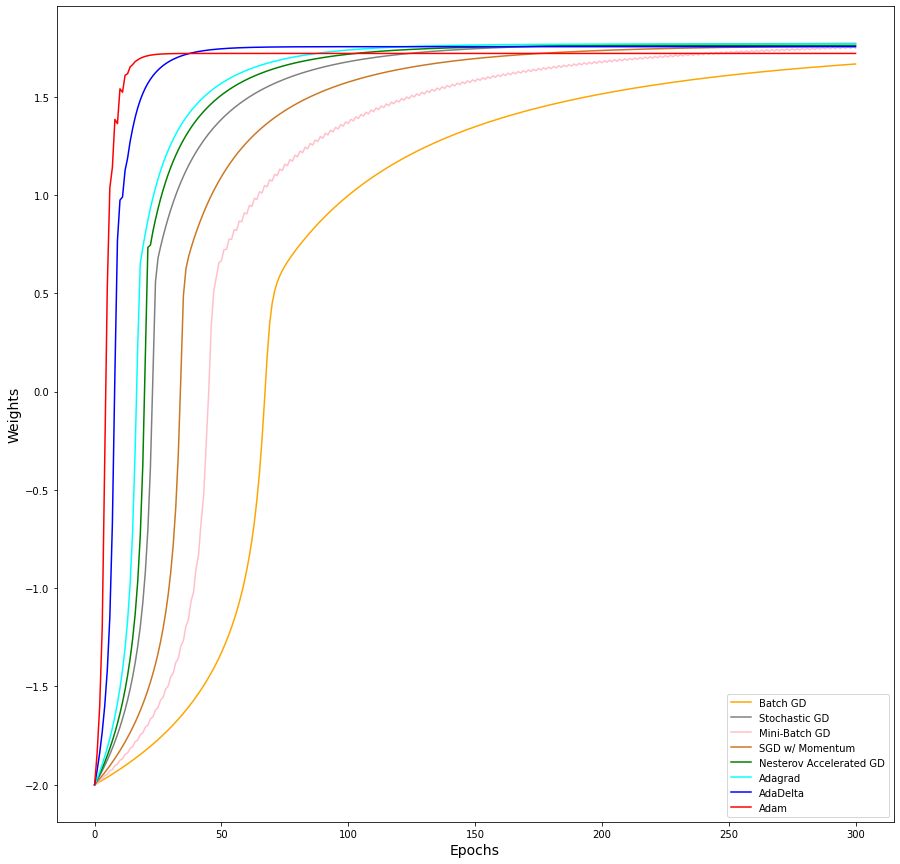

In [126]:
epoch_range = [i for i in range(0, noofepochs + 1)]

plt.figure(figsize = (15, 15))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Weights", fontsize = 14)
plt.plot(epoch_range, [-2, *weights_bgd], color = 'orange')
plt.plot(epoch_range, [-2, *weights_sgd], color = 'grey')
plt.plot(epoch_range, [-2, *weights_mbgd], color = 'pink')
plt.plot(epoch_range, [-2, *weights_sgdm], color = '#cc7722')
plt.plot(epoch_range, [-2, *weights_nagd], color = 'green')
plt.plot(epoch_range, [-2, *weights_adg], color = 'cyan')
plt.plot(epoch_range, [-2, *weights_adrp], color = 'blue')
plt.plot(epoch_range, [-2, *weights_adam], color = 'red')
plt.legend(["Batch GD", "Stochastic GD", "Mini-Batch GD", "SGD w/ Momentum", "Nesterov Accelerated GD", "Adagrad", "AdaDelta", "Adam"], loc = "best")
plt.show()

<h4 style="color: pink;">ii) Bias v/s Epochs</h4>

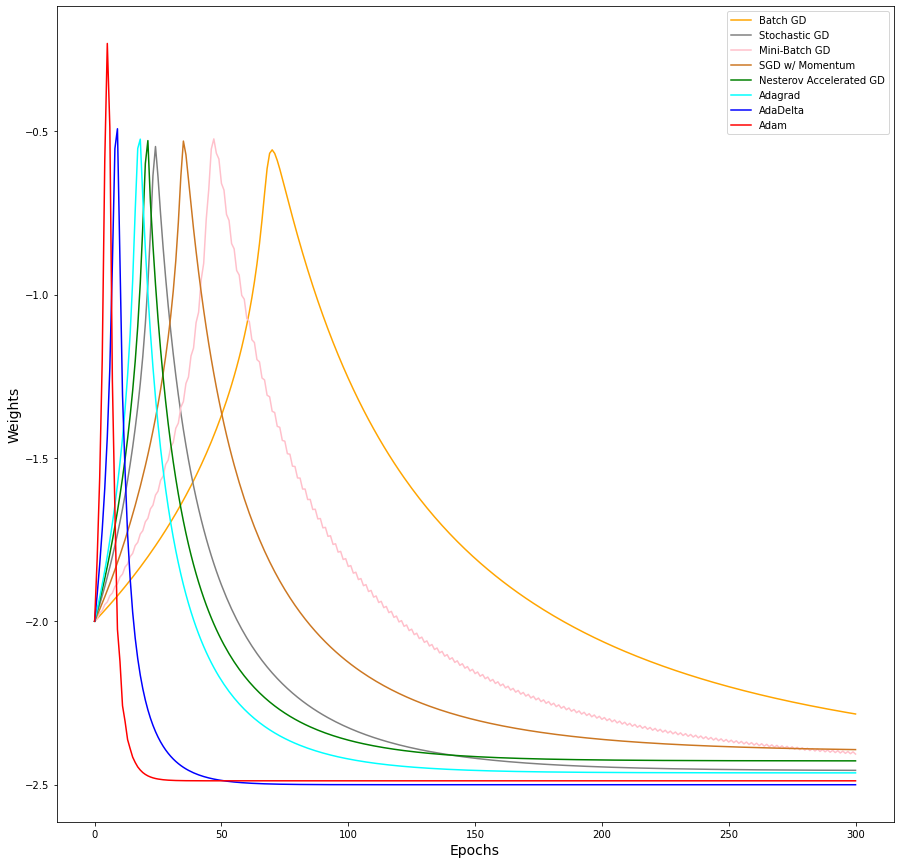

In [127]:
epoch_range = [i for i in range(0, noofepochs + 1)]

plt.figure(figsize = (15, 15))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Weights", fontsize = 14)
plt.plot(epoch_range, [-2, *biases_bgd], color = 'orange')
plt.plot(epoch_range, [-2, *biases_sgd], color = 'grey')
plt.plot(epoch_range, [-2, *biases_mbgd], color = 'pink')
plt.plot(epoch_range, [-2, *biases_sgdm], color = '#cc7722')
plt.plot(epoch_range, [-2, *biases_nagd], color = 'green')
plt.plot(epoch_range, [-2, *biases_adg], color = 'cyan')
plt.plot(epoch_range, [-2, *biases_adrp], color = 'blue')
plt.plot(epoch_range, [-2, *biases_adam], color = 'red')
plt.legend(["Batch GD", "Stochastic GD", "Mini-Batch GD", "SGD w/ Momentum", "Nesterov Accelerated GD", "Adagrad", "AdaDelta", "Adam"], loc = "best")
plt.show()

<h4 style="color: pink;">iii) Mean Squared Error v/s Epochs</h4>

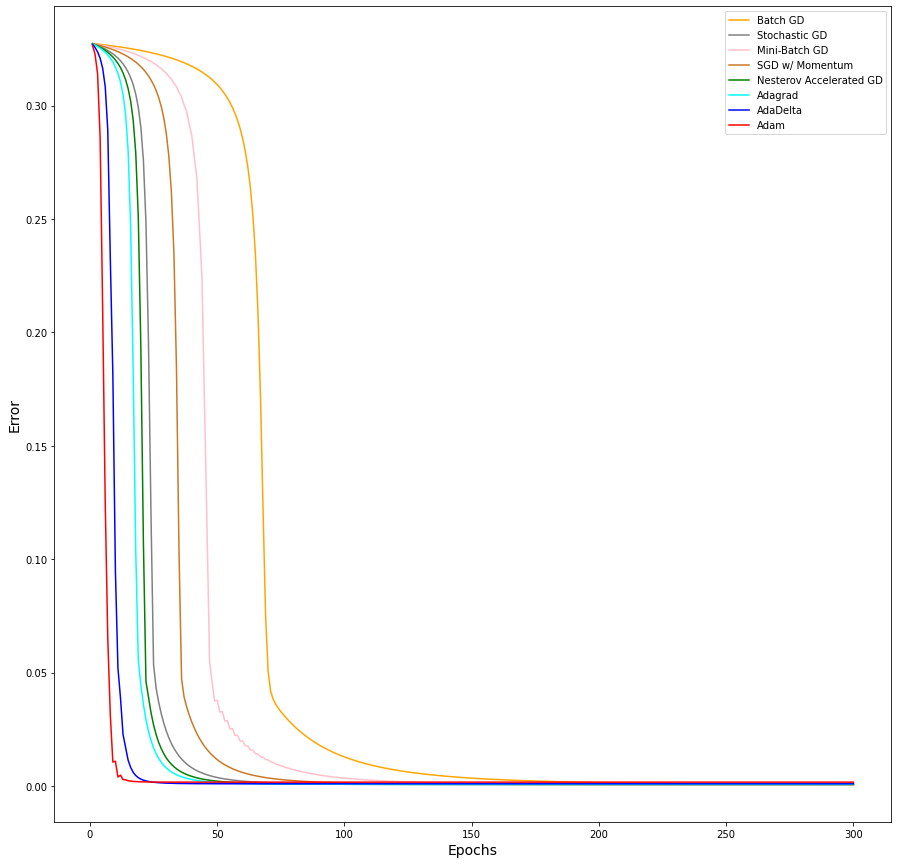

In [128]:
epoch_range = [i for i in range(1, noofepochs + 1)]

plt.figure(figsize = (15, 15))
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Error", fontsize = 14)
plt.plot(epoch_range, [np.mean(i) for i in errors_bgd], color = 'orange')
plt.plot(epoch_range, [np.mean(i) for i in errors_sgd], color = 'grey')
plt.plot(epoch_range, [np.mean(i) for i in errors_mbgd], color = 'pink')
plt.plot(epoch_range, [np.mean(i) for i in errors_sgdm], color = '#cc7722')
plt.plot(epoch_range, [np.mean(i) for i in errors_nagd], color = 'green')
plt.plot(epoch_range, [np.mean(i) for i in errors_adg], color = 'cyan')
plt.plot(epoch_range, [np.mean(i) for i in errors_adrp], color = 'blue')
plt.plot(epoch_range, [np.mean(i) for i in errors_adam], color = 'red')
plt.legend(["Batch GD", "Stochastic GD", "Mini-Batch GD", "SGD w/ Momentum", "Nesterov Accelerated GD", "Adagrad", "AdaDelta", "Adam"], loc = "best")
plt.show()

<h3 style="font-family: Poppins; color: #e51fac">Conclusion</h3>

* Hence it can be seen that the Adam optimization technique is the best performing optimization.